In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
df = pd.read_csv('trawlers.csv')

# Drop rows where is_fishing is not 1 or 0
df = df[df['is_fishing'].isin([0, 1])]

# Drop unnecessary parameters
df.drop(df.columns.difference(['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']), axis=1, inplace=True)

# Drop rows with null values
df.dropna(inplace=True)

In [3]:
# Separate features and target variable
X = df.drop('is_fishing', axis=1)
y = df['is_fishing']

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
4374/4374 [==============================] - 8s 2ms/step - loss: 0.2786 - accuracy: 0.8814
Epoch 2/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2489 - accuracy: 0.8986
Epoch 3/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2413 - accuracy: 0.9021
Epoch 4/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2377 - accuracy: 0.9038
Epoch 5/10
4374/4374 [==============================] - 8s 2ms/step - loss: 0.2346 - accuracy: 0.9052
Epoch 6/10
4374/4374 [==============================] - 8s 2ms/step - loss: 0.2325 - accuracy: 0.9063
Epoch 7/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2305 - accuracy: 0.9078
Epoch 8/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2288 - accuracy: 0.9084
Epoch 9/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.2275 - accuracy: 0.9091
Epoch 10/10
4374/4374 [==============================] - 7s 2ms/step - loss: 0.225

In [8]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

1094/1094 [==============================] - 2s 1ms/step


In [9]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9107357228605728
F1 Score: 0.8796578166544641
Precision: 0.8453562435194786
Recall: 0.9168607920314885
Confusion Matrix:
[[20449  2088]
 [ 1035 11414]]


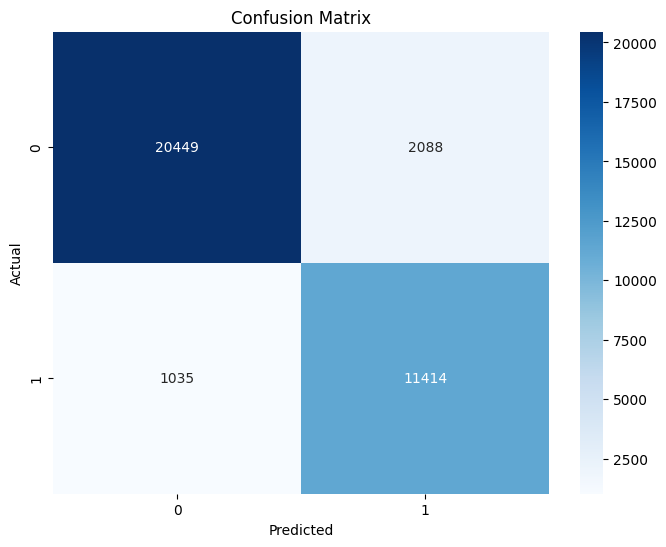

In [10]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

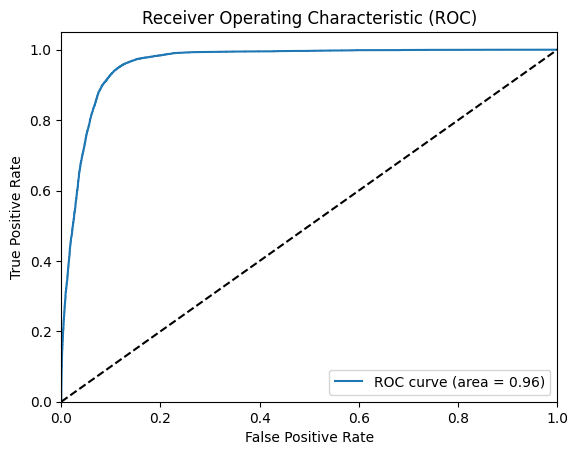

In [11]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [12]:
model.save('FFNN_model.h5')
